In [0]:
# Run in colab
%tensorflow_version 1.x

import keras
from keras.layers import SimpleRNN, Embedding, Dense, LSTM
from keras.models import Sequential
from keras.datasets import imdb
from keras.preprocessing import sequence

import matplotlib.pyplot as plt

keras.__version__

Using TensorFlow backend.


'2.2.5'

## Basic SimpleRNN network

In [0]:
# return_sequences = False (Default) 전달 시, 입력 sequence에 대한 마지막 출력만 반환 (2D 텐서)
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=2))
model.add(SimpleRNN(units=32))
model.summary()




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 2)           20000     
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                1120      
Total params: 21,120
Trainable params: 21,120
Non-trainable params: 0
_________________________________________________________________


In [0]:
# return_sequences = True 전달 시, 각 timestep의 출력을 모은 전체 sequence 반환 (3D 텐서)
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=2))
model.add(SimpleRNN(units=32, return_sequences=True))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 2)           20000     
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          1120      
Total params: 21,120
Trainable params: 21,120
Non-trainable params: 0
_________________________________________________________________


In [0]:
# 여러 순환 층을 차례로 쌓으면 네트워크의 표현력 증가 (중간 층은 전체 sequence 출력해야 함)
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


# Train SimpleRNN model with imdb dataset

## Prepare dataset

In [0]:
max_features = 10000  # number of words
max_len = 500  # length of each seqeunce (review)
batch_size = 32

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print('\nnumber of train sequences :', len(input_train))
print('number of test sequences  :', len(input_test))

input_train = sequence.pad_sequences(input_train, maxlen=max_len)
input_test = sequence.pad_sequences(input_test, maxlen=max_len)
print('\nshape of input_train :', input_train.shape)
print('shape of input_test  :', input_test.shape)

17465344/17464789 [==============================] - 1s 0us/step

number of train sequences : 25000
number of test sequences  : 25000

shape of input_train : (25000, 500)
shape of input_test  : (25000, 500)


## Generate & Train a neural network model

In [0]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=keras.optimizers.RMSprop(), loss=keras.losses.binary_crossentropy, metrics=[keras.metrics.binary_accuracy])
history = model.fit(input_train, y_train, batch_size=batch_size, 
          epochs=10, validation_split=0.2)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 20000 samples, validate on 5000 samples
Epoch 1/10





20000/20000 [==============================] - 108s 5ms/step - loss: 0.5310 - binary_accuracy: 0.7205 - val_loss: 0.3902 - val_binary_accuracy: 0.8366
Epoch 2/10
20000/20000 [==============================] - 97s 5ms/step - loss: 0.3350 - binary_accuracy: 0.8655 - val_loss: 0.3360 - val_binary_accuracy: 0.8668
Epoch 3/10
20000/20000 [==============================] - 96s 5ms/step - loss: 0.2783 - binary_accuracy: 0.8914 - val_loss: 0.3690 - val_binary_accuracy: 0.8408
Epoch 4/10
20000/20000 [==============================] - 94s 5ms/step - loss: 0.2247 - binary_accuracy: 0.9161 - val_loss: 0.4343 - val_binary_accuracy: 0.8472
Epoch 5/10
20000/20000 [==============================] - 93s 5ms/step - loss: 0.1949 - binary_accuracy: 0.9282 - val_loss: 0.3995 - val_binary_accuracy: 0.8260
Epoch 6/10
20000/20000 [=================

## Visualize the results

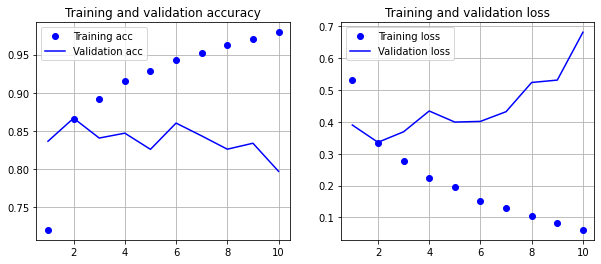

In [0]:
acc = history.history['binary_accuracy']
loss = history.history['loss']

val_acc = history.history['val_binary_accuracy']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)


fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].plot(epochs, acc, 'bo', label='Training acc')
ax[0].plot(epochs, val_acc, 'b', label='Validation acc')
ax[0].set_title('Training and validation accuracy')
ax[0].legend()
ax[0].grid()

ax[1].plot(epochs, loss, 'bo', label='Training loss')
ax[1].plot(epochs, val_loss, 'b', label='Validation loss')
ax[1].set_title('Training and validation loss')
ax[1].legend()
ax[1].grid()
plt.show()

# Train LSTM model with imdb dataset

## Generate & Train a neural network model

In [0]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(LSTM(units=32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=keras.optimizers.RMSprop(), loss=keras.losses.binary_crossentropy, metrics=[keras.metrics.binary_accuracy])
history = model.fit(input_train, y_train, batch_size=128, 
          epochs=10, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 95s 5ms/step - loss: 0.5165 - binary_accuracy: 0.7599 - val_loss: 0.3895 - val_binary_accuracy: 0.8326
Epoch 2/10
20000/20000 [==============================] - 94s 5ms/step - loss: 0.2926 - binary_accuracy: 0.8876 - val_loss: 0.3276 - val_binary_accuracy: 0.8648
Epoch 3/10
20000/20000 [==============================] - 94s 5ms/step - loss: 0.2343 - binary_accuracy: 0.9119 - val_loss: 0.4499 - val_binary_accuracy: 0.8510
Epoch 4/10
20000/20000 [==============================] - 94s 5ms/step - loss: 0.2025 - binary_accuracy: 0.9238 - val_loss: 0.4036 - val_binary_accuracy: 0.8650
Epoch 5/10
20000/20000 [==============================] - 93s 5ms/step - loss: 0.1785 - binary_accuracy: 0.9354 - val_loss: 0.2900 - val_binary_accuracy: 0.8882
Epoch 6/10
20000/20000 [==============================] - 93s 5ms/step - loss: 0.1603 - binary_accuracy: 0.9412 - val_loss: 0.3306 - val_binary_ac

## Visualize the results

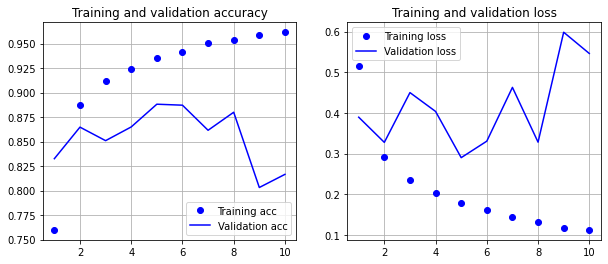

In [0]:
acc = history.history['binary_accuracy']
loss = history.history['loss']

val_acc = history.history['val_binary_accuracy']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)


fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].plot(epochs, acc, 'bo', label='Training acc')
ax[0].plot(epochs, val_acc, 'b', label='Validation acc')
ax[0].set_title('Training and validation accuracy')
ax[0].legend()
ax[0].grid()

ax[1].plot(epochs, loss, 'bo', label='Training loss')
ax[1].plot(epochs, val_loss, 'b', label='Validation loss')
ax[1].set_title('Training and validation loss')
ax[1].legend()
ax[1].grid()
plt.show()